# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rm

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Listing the unique mice ID.
Arr_mice=combined_data['Mouse ID'].unique()
Arr_mice


array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [3]:
#Checking the count of the mice ID
count_mice=len(Arr_mice)
count_mice

249

In [4]:
 #Check whether there is duplicate Timepoint value under each Mouse ID
dump=combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")
dump.unique()


array([False,  True])

In [5]:
##Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dump_value=combined_data[dump]
dump_value["Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
#Display the Timepoint, Mouse ID associated with the Duplicate Mouse ID
new_dump=pd.DataFrame(dump_value, columns=["Mouse ID", "Timepoint"])
new_dump

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_all_mice = combined_data.loc[combined_data["Mouse ID"] == 'g989', :]
dup_all_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#get the total duplicate Timepoint with MOuse ID g989
len(dup_all_mice)

13

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID, but keep the other mouse ID.
clean_data = combined_data[combined_data['Mouse ID']!="g989"]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary= pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 

# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_table =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
#get the columns name of the clean datebase
clean_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [14]:
#Calculate the total number of timepoints for all mice tested for each drug regimen
total_timepoint=clean_data["Timepoint"].groupby(clean_data['Drug Regimen']).sum()
total_timepoint

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2525
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

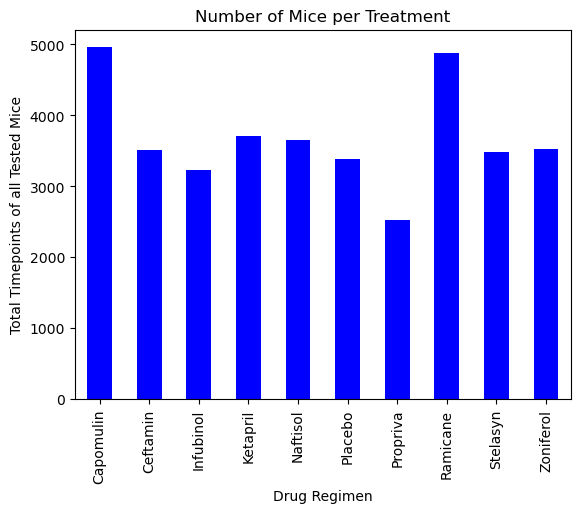

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = total_timepoint.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints of all Tested Mice")
plt.title("Number of Mice per Treatment")

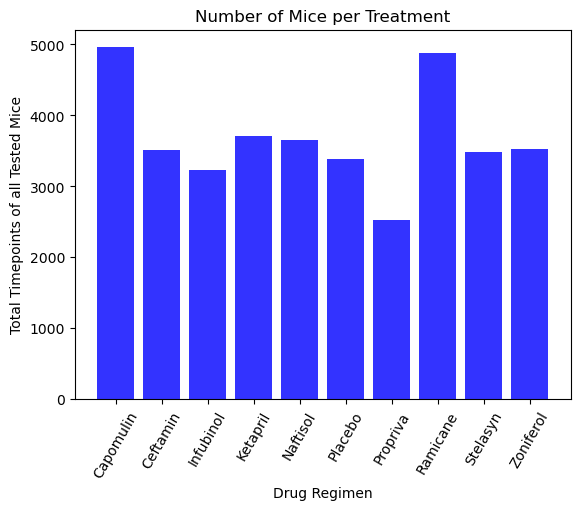

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = total_timepoint.index.values
y_axis = total_timepoint.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints of all Tested Mice")
plt.title("Number of Mice per Treatment")
plt.xticks(rotation=60)
plt.show()


In [17]:
#Get the total number of female and male mice 
gender=clean_data['Mouse ID'].groupby(clean_data['Sex']).count()
gender

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

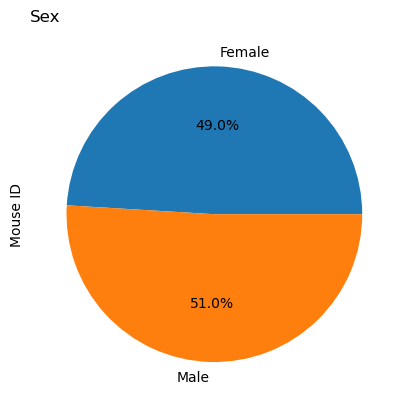

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender.plot.pie(autopct= "%1.1f%%")
plt.title("Sex",loc="left")
plt.show()


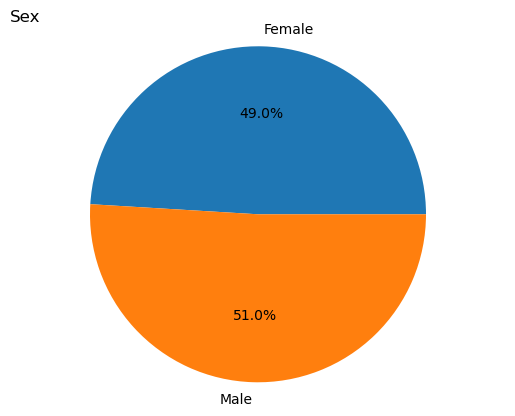

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderlabels = ['Female', 'Male']
y = np.array([922, 958])
plt.pie(y, labels=genderlabels, autopct="%1.1f%%")
plt.title("Sex",loc="left")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# step1, reorganize the data across four of the treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [21]:
#step2, Find the last (greatest) time point for each mouse
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_max = Capomulin_df.groupby('Mouse ID').max()["Timepoint"]
Ramicane_max = Ramicane_df.groupby('Mouse ID').max()["Timepoint"]
Infubinol_max = Infubinol_df.groupby('Mouse ID').max()["Timepoint"]
Ceftamin_max = Ceftamin_df.groupby('Mouse ID').max()["Timepoint"]

In [22]:
#Step3， Create a grouped DataFrame for above 
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_pd = pd.DataFrame(Capomulin_max)
Ramicane_pd = pd.DataFrame(Ramicane_max) 
Infubinol_pd = pd.DataFrame(Infubinol_max)
Ceftamin_pd = pd.DataFrame(Ceftamin_max)

In [23]:
#Step 4_1,Capomulin, Merge above grouped DataFrame with the original cleaned DataFrame
#Capomulin
Capomulin_merge = pd.merge(Capomulin_pd, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [24]:
#Step 4_2, Ramicane, Merge above grouped DataFrame with the original cleaned DataFrame
#Ramicane
Ramicane_merge = pd.merge(Ramicane_pd, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [25]:
#Step 4_3, Infubinol, Merge above grouped DataFrame with the original cleaned DataFrame
#Infubinol
Infubinol_merge = pd.merge(Infubinol_pd, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [26]:
#Step 4_4, Ceftamin, Merge above grouped DataFrame with the original cleaned DataFrame
#Ceftamin
Ceftamin_merge = pd.merge(Ceftamin_pd, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [27]:
#Create a list that holds the treatment names for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [28]:
#combine new dataframe with corresponding to each treatment: Capomulin, Ramicane, Infubinol, and Ceftamin
new_combined_data=combined_data[combined_data["Drug Regimen"].isin(regimen)]
new_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [29]:
#creat an empty list to hold the tumour volume data (for looping and plotting)
tumor_data=0

# Locate the rows which contain mice on each drug and get the tumor volumes 
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = new_combined_data.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
max_timepoint = max_timepoint.stack(level=0).unstack(level=0)

 #Loop through each "Drug Regimen" in the treatment list
for r in regimen:
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = max_timepoint[r].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)

    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if tumor_data == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {r} treatments is: {lowerq}")
    print(f"The upper quartile of {r} treatments is: {upperq}")
    print(f"The interquartile range of {r} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {r} outliers.")
    print(f"Values above {upper_bound} could be {r} outliers.")
    print(f"------------------------------------------------------------")
    tumor_data+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

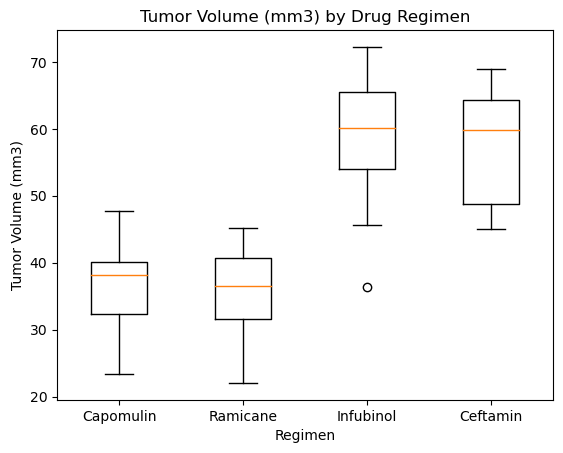

In [30]:
boxplot_list = []
for r in regimen:
    boxplot_list.append(list(max_timepoint[r].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Drug Regimen")
plt.boxplot(boxplot_list)
plt.xticks([1,2,3,4,],regimen)
plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Step1, Select a mouse "b128" that was treated with Capomulin, and display all columns of Mouse ID "b128".
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
line_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


Text(0, 0.5, 'Tumor Volume (mm3)')

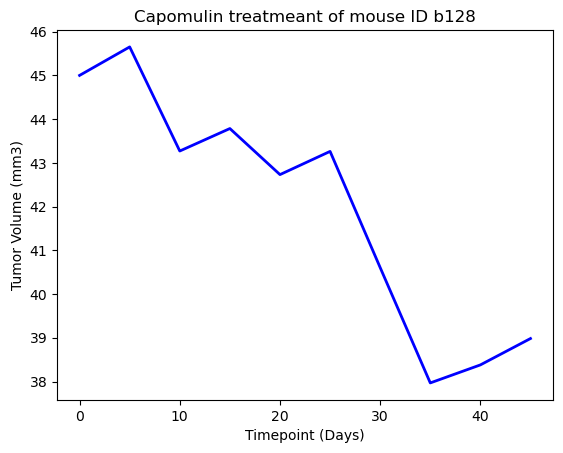

In [32]:
#step2, generate a line plot of tumour volume versus time point for the mouse "b128".

x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse ID b128')
marker_size=15
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

/var/folders/5d/mdpkmp_j1qzgpf8t41x4f6lh0000gn/T/ipykernel_98036/3601651029.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin=Capomulin_df.groupby(['Mouse ID']).mean()


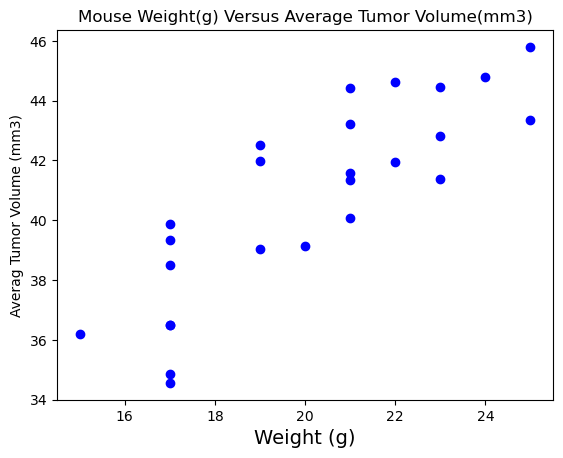

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capomulin=Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=20
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'], marker='o',color="blue")
plt.title('Mouse Weight(g) Versus Average Tumor Volume(mm3)')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [34]:
# Calculate and print the correlation coefficient for Capomulin
correlation = st.pearsonr(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


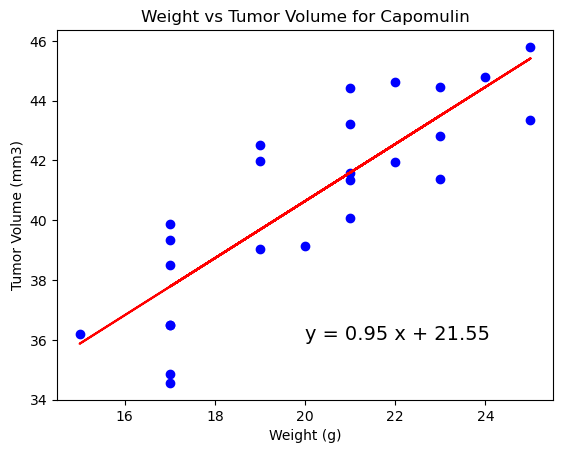

In [35]:
# linear regression model

from scipy.stats import linregress as lgs

(slope, intercept,rvalue, pvalue, stderr)=lgs(avg_capomulin["Weight (g)"],avg_capomulin["Tumor Volume (mm3)"])
regression =avg_capomulin["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capomulin["Weight (g)"],avg_capomulin["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capomulin["Weight (g)"], regression, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()